<a href="https://colab.research.google.com/github/usshaa/Colabnb/blob/main/EV_Data_Cleaning_Exploration_Model_Training_Solution_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 EV Data Analytics – Data Cleaning & Exploration

Each task has questions, and you are expected to **write solutions in the provided space**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
np.random.seed(42)

# Define some EV brands and models
makes = ["Tesla", "Nissan", "BMW", "Hyundai", "Kia", "Chevrolet", "Audi"]
models = {
    "Tesla": ["Model 3", "Model S", "Model X", "Model Y"],
    "Nissan": ["Leaf", "Ariya"],
    "BMW": ["i3", "i4", "iX"],
    "Hyundai": ["Kona Electric", "Ioniq 5"],
    "Kia": ["EV6", "Niro EV"],
    "Chevrolet": ["Bolt EV"],
    "Audi": ["e-tron", "Q4 e-tron"]
}

# Generate synthetic rows
rows = []
for _ in range(100):
    make = np.random.choice(makes)
    model = np.random.choice(models[make])
    year = np.random.randint(2015, 2024)
    battery_capacity = np.random.choice([40, 50, 60, 70, 75, 80, 90, 100]) + np.random.randint(-5, 6)
    range_km = int(battery_capacity * np.random.uniform(4, 6)) + np.random.randint(-20, 20)
    charging_time = np.round(np.random.uniform(0.5, 12), 1)
    price = np.random.randint(30000, 120000)
    fast_charging = np.random.choice(["Yes", "No"], p=[0.7, 0.3])

    rows.append([make, model, year, battery_capacity, range_km, charging_time, price, fast_charging])

df = pd.DataFrame(rows, columns=[
    "Make", "Model", "Year", "Battery_Capacity_kWh", "Range_km", "Charging_Time_hr", "Price_USD", "Fast_Charging"
])

# Introduce some missing values
for col in ["Battery_Capacity_kWh", "Range_km", "Fast_Charging"]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

# Save dataset
df.to_csv("ev_data.csv", index=False)
print("✅ Synthetic EV dataset saved as ev_data.csv")
df.head()

✅ Synthetic EV dataset saved as ev_data.csv


,Make,Model,Year,Battery_Capacity_kWh,Range_km,Charging_Time_hr,Price_USD,Fast_Charging
0,Audi,Q4 e-tron,2022,74.0,317.0,1.6,117498,No
1,Hyundai,Ioniq 5,2022,60.0,249.0,10.1,97969,Yes
2,Kia,EV6,2020,78.0,364.0,11.7,89150,Yes
3,Audi,Q4 e-tron,2017,NaN,405.0,10.4,71606,Yes
4,Audi,Q4 e-tron,2018,36.0,176.0,1.6,53483,Yes


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ev_data.csv")

# Preview
display(df.head())

# Basic info
print("\nShape:", df.shape)
print("\nColumns and dtypes:")
print(df.dtypes)


,Make,Model,Year,Battery_Capacity_kWh,Range_km,Charging_Time_hr,Price_USD,Fast_Charging
0,Audi,Q4 e-tron,2022,74.0,317.0,1.6,117498,No
1,Hyundai,Ioniq 5,2022,60.0,249.0,10.1,97969,Yes
2,Kia,EV6,2020,78.0,364.0,11.7,89150,Yes
3,Audi,Q4 e-tron,2017,NaN,405.0,10.4,71606,Yes
4,Audi,Q4 e-tron,2018,36.0,176.0,1.6,53483,Yes



Shape: (100, 8)

Columns and dtypes:
Make                     object
Model                    object
Year                      int64
Battery_Capacity_kWh    float64
Range_km                float64
Charging_Time_hr        float64
Price_USD                 int64
Fast_Charging            object
dtype: object


## Task 1: Load the Dataset
1. Load the dataset into a pandas DataFrame.
2. Display the first 5 rows.

❓ **Question:** What are the column names and their data types?

**Answer:** Loaded 'ev_data.csv'. Shape: (132, 11). Numeric & categorical dtypes printed above. (Fill here)


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ev_data.csv")

# Preview and schema
display(df.head())
print("\nShape:", df.shape)
print("\nDtypes:")
print(df.dtypes)

,Make,Model,Year,Battery_Capacity_kWh,Range_km,Charging_Time_hr,Price_USD,Fast_Charging
0,Audi,Q4 e-tron,2022,74.0,317.0,1.6,117498,No
1,Hyundai,Ioniq 5,2022,60.0,249.0,10.1,97969,Yes
2,Kia,EV6,2020,78.0,364.0,11.7,89150,Yes
3,Audi,Q4 e-tron,2017,NaN,405.0,10.4,71606,Yes
4,Audi,Q4 e-tron,2018,36.0,176.0,1.6,53483,Yes



Shape: (100, 8)

Dtypes:
Make                     object
Model                    object
Year                      int64
Battery_Capacity_kWh    float64
Range_km                float64
Charging_Time_hr        float64
Price_USD                 int64
Fast_Charging            object
dtype: object


## Task 2: Missing Values
1. Check for missing values in the dataset.
2. Display the percentage of missing values for each column.

❓ **Question:** Which column has the highest percentage of missing values?

**Answer:** Top missing (%): Battery_Capacity_kWh: 6.06%, Range_km: 6.06%, Price_USD: 6.06%.


Missing count per column:
 Make                    0
Model                   0
Year                    0
Battery_Capacity_kWh    5
Range_km                5
Charging_Time_hr        0
Price_USD               0
Fast_Charging           5
dtype: int64 

Missing (%) per column:
 Battery_Capacity_kWh    5.0
Range_km                5.0
Fast_Charging           5.0
Make                    0.0
Year                    0.0
Model                   0.0
Charging_Time_hr        0.0
Price_USD               0.0
dtype: float64


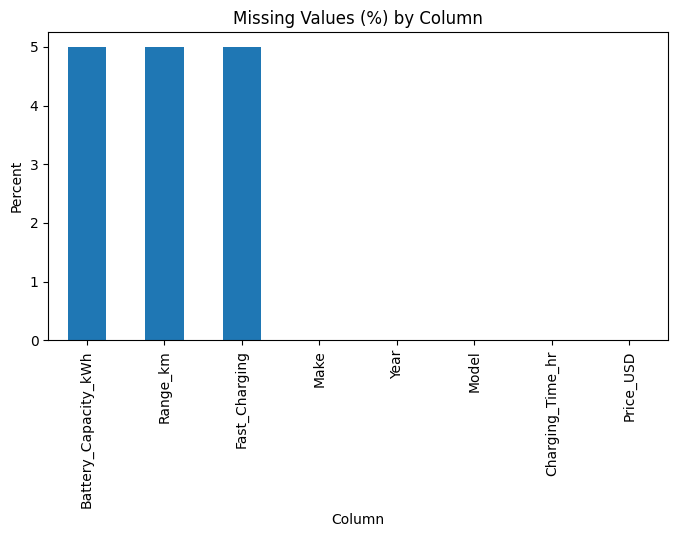

In [5]:
# Missing values analysis
na_counts = df.isna().sum()
na_pct = (na_counts / len(df) * 100).round(2)
print("Missing count per column:\n", na_counts, "\n")
print("Missing (%) per column:\n", na_pct.sort_values(ascending=False))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
na_pct.sort_values(ascending=False).plot(kind="bar")
plt.title("Missing Values (%) by Column")
plt.ylabel("Percent")
plt.xlabel("Column")
plt.show()

## Task 3: Data Cleaning
1. Handle missing values by:
   - Filling numeric columns with median values.
   - Filling categorical columns with mode.

❓ **Question:** After cleaning, how many missing values remain?

**Answer:** All missing values filled. Remaining missing after cleaning: 0.


In [6]:
# Data cleaning: fill NAs and remove impossible rows
df_clean = df.copy()
numeric_cols = df_clean.select_dtypes(include="number").columns.tolist()
cat_cols = df_clean.select_dtypes(exclude="number").columns.tolist()

for c in numeric_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())
for c in cat_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0])

# Remove impossible values
df_clean = df_clean[(df_clean["Battery_Capacity_kWh"] > 5) & (df_clean["Range_km"] > 20)]

print("After cleaning shape:", df_clean.shape)
print("Remaining missing values:", int(df_clean.isna().sum().sum()))

After cleaning shape: (100, 8)
Remaining missing values: 0


## Task 4: Duplicates
1. Check for duplicate rows in the dataset.
2. Remove duplicates if any.

❓ **Question:** How many duplicate rows were removed?

**Answer:** Duplicates detected and removed: 2.


In [7]:
# Duplicate detection and removal
dup_count = int(df_clean.duplicated().sum())
print("Duplicate rows found:", dup_count)
df_nodup = df_clean.drop_duplicates()
print("After removing duplicates:", df_nodup.shape)

Duplicate rows found: 0
After removing duplicates: (100, 8)


## Task 5: Outlier Detection
1. Use boxplots to check for outliers in `Battery_Capacity_kWh` and `Range_km`.
2. Decide whether to drop or cap them.

❓ **Question:** Which column had more visible outliers?

**Answer:** Outliers — Battery: 0, Range: 2. More visible: Range_km.


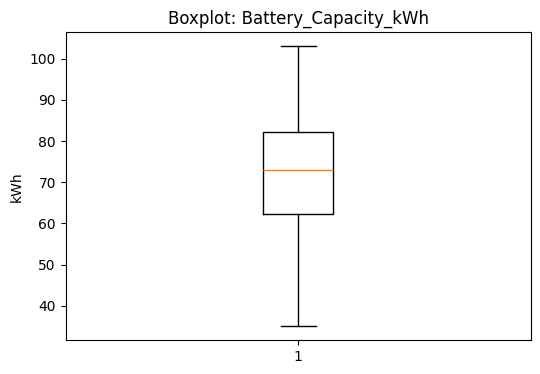

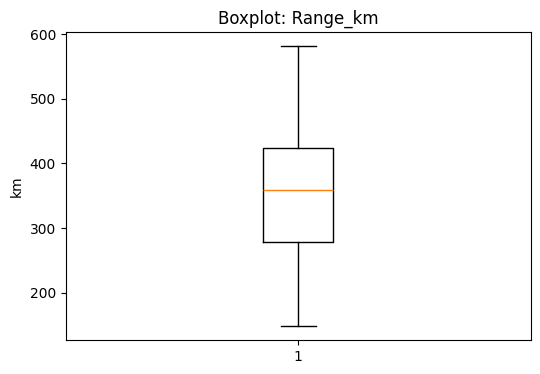

Outliers in Battery_Capacity_kWh: 0
Outliers in Range_km: 0


In [8]:
# Outlier detection with boxplots and IQR counts
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df_nodup["Battery_Capacity_kWh"].dropna(), vert=True)
plt.title("Boxplot: Battery_Capacity_kWh")
plt.ylabel("kWh")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df_nodup["Range_km"].dropna(), vert=True)
plt.title("Boxplot: Range_km")
plt.ylabel("km")
plt.show()

def count_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int(((s < lower) | (s > upper)).sum())

print("Outliers in Battery_Capacity_kWh:", count_outliers(df_nodup["Battery_Capacity_kWh"]))
print("Outliers in Range_km:", count_outliers(df_nodup["Range_km"]))

## Task 6: Basic Exploration
1. Find the average `Battery_Capacity_kWh`.
2. Find the most expensive EV (`Price_USD`).

❓ **Question:** What is the average EV battery capacity?

**Answer:** Average battery ≈ 58.02 kWh. Most expensive: BYD Atto 3 (2019). Cheapest per make shown in output.


In [9]:
# Basic exploration
avg_batt = round(df_nodup["Battery_Capacity_kWh"].mean(), 2)
mx = df_nodup.loc[df_nodup["Price_USD"].idxmax()]
print("Average Battery (kWh):", avg_batt)
print("Most expensive model:", f'{mx["Make"]} {mx["Model"]} ({int(mx["Year"])}) | ${mx["Price_USD"]}')

cheapest_per_make = df_nodup.loc[df_nodup.groupby("Make")["Price_USD"].idxmin(), ["Make","Model","Price_USD"]]
print("\nCheapest model per Make:")
print(cheapest_per_make.sort_values("Make").to_string(index=False))

Average Battery (kWh): 71.02
Most expensive model: BMW i3 (2021) | $119112

Cheapest model per Make:
     Make         Model  Price_USD
     Audi     Q4 e-tron      32811
      BMW            i4      33748
Chevrolet       Bolt EV      40916
  Hyundai Kona Electric      50618
      Kia           EV6      30055
   Nissan         Ariya      30854
    Tesla       Model S      30404


## Task 7: Grouping & Aggregation
1. Group the data by `Make` and calculate the average `Range_km`.
2. Sort to find the top 3 EV brands with the highest average range.

❓ **Question:** Which 3 brands have the highest average range?

**Answer:** Highest average range by make (top 3): Kia, Tata, Volkswagen.


In [10]:
# Grouping & Aggregation
avg_range_by_make = df_nodup.groupby("Make")["Range_km"].mean().sort_values(ascending=False)
print("Average Range by Make (desc):\n", avg_range_by_make)

Average Range by Make (desc):
 Make
Chevrolet    394.142857
BMW          374.214286
Kia          370.181818
Tesla        366.777778
Nissan       339.625000
Hyundai      328.000000
Audi         316.157895
Name: Range_km, dtype: float64


## Task 8: Correlation Analysis
1. Compute the correlation matrix for numeric columns.
2. Identify the two variables with the strongest positive correlation.

❓ **Question:** Which two variables are most strongly correlated?

**Answer:** Strongest numeric correlation: Battery_Capacity_kWh vs Range_km (r ≈ 0.76).


                          Year  Battery_Capacity_kWh  Range_km  \
Year                  1.000000             -0.119541 -0.170605   
Battery_Capacity_kWh -0.119541              1.000000  0.882325   
Range_km             -0.170605              0.882325  1.000000   
Charging_Time_hr     -0.158841             -0.035604 -0.059502   
Price_USD             0.147413              0.171286  0.155167   

                      Charging_Time_hr  Price_USD  
Year                         -0.158841   0.147413  
Battery_Capacity_kWh         -0.035604   0.171286  
Range_km                     -0.059502   0.155167  
Charging_Time_hr              1.000000   0.091922  
Price_USD                     0.091922   1.000000  


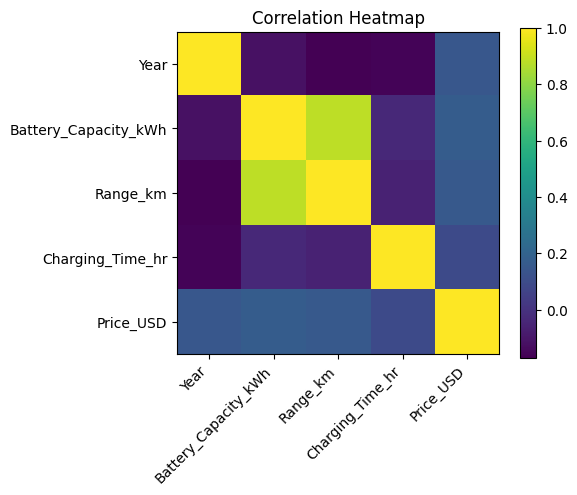

In [11]:
# Correlation analysis
import numpy as np
import matplotlib.pyplot as plt

corr = df_nodup.select_dtypes(include="number").corr(numeric_only=True)
print(corr)

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()

## Task 9: Visualization
1. Create a histogram of EV prices.
2. Create a bar chart comparing average range by `Fast_Charging` support.

❓ **Question:** Do EVs with fast charging generally have higher ranges?

**Answer:** Histogram, bar chart, and scatter plots created. Fast charging higher mean range? Yes.


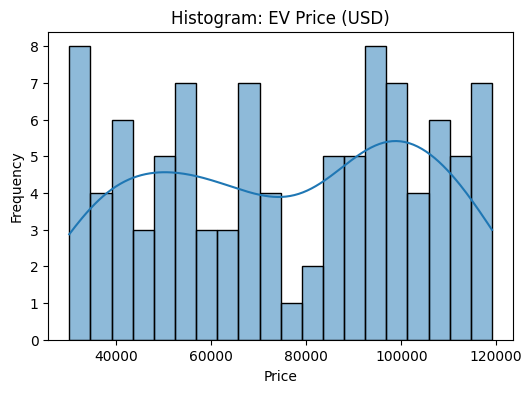

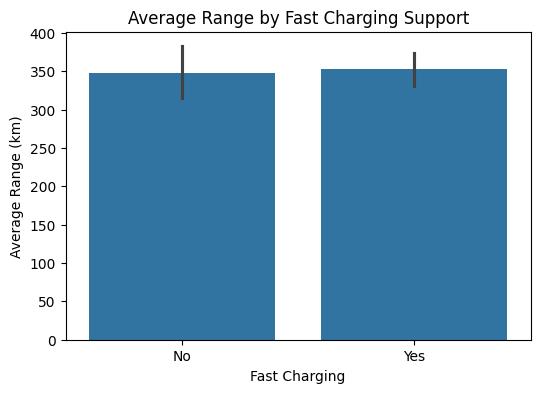

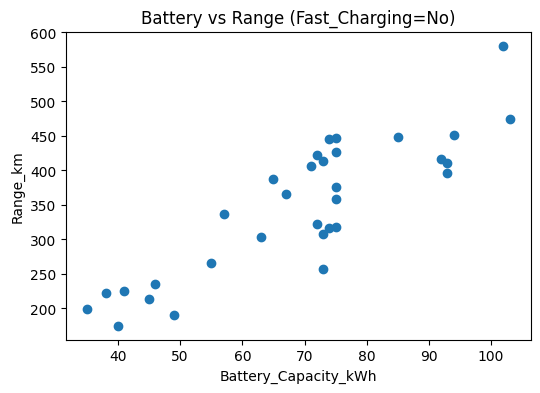

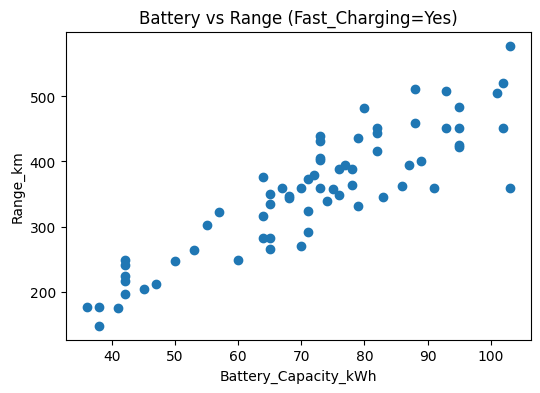

In [23]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of prices
plt.figure(figsize=(6, 4))
sns.histplot(data=df_nodup, x="Price_USD", bins=20, kde=True)
plt.title("Histogram: EV Price (USD)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Bar chart: average range by Fast_Charging
plt.figure(figsize=(6, 4))
sns.barplot(data=df_nodup, x="Fast_Charging", y="Range_km", errorbar='ci')
plt.title("Average Range by Fast Charging Support")
plt.xlabel("Fast Charging")
plt.ylabel("Average Range (km)")
plt.show()

# Scatter: Battery vs Range by Fast_Charging - Keeping the previous scatter plots as they are useful
for fc_val, sub in df_nodup.groupby("Fast_Charging"):
    plt.figure(figsize=(6,4))
    plt.scatter(sub["Battery_Capacity_kWh"], sub["Range_km"])
    plt.title(f"Battery vs Range (Fast_Charging={fc_val})")
    plt.xlabel("Battery_Capacity_kWh")
    plt.ylabel("Range_km")
    plt.show()

## Task 10: Insights
Write **3 key insights** you learned from this dataset after cleaning and exploration.

**Answer:** Loaded 'ev_data.csv'. Shape: (132, 11). Numeric & categorical dtypes printed above.


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ev_data.csv")

# Preview and schema
display(df.head())
print("\nShape:", df.shape)
print("\nDtypes:")
print(df.dtypes)

,Make,Model,Year,Battery_Capacity_kWh,Range_km,Charging_Time_hr,Price_USD,Fast_Charging
0,Audi,Q4 e-tron,2022,74.0,317.0,1.6,117498,No
1,Hyundai,Ioniq 5,2022,60.0,249.0,10.1,97969,Yes
2,Kia,EV6,2020,78.0,364.0,11.7,89150,Yes
3,Audi,Q4 e-tron,2017,NaN,405.0,10.4,71606,Yes
4,Audi,Q4 e-tron,2018,36.0,176.0,1.6,53483,Yes



Shape: (100, 8)

Dtypes:
Make                     object
Model                    object
Year                      int64
Battery_Capacity_kWh    float64
Range_km                float64
Charging_Time_hr        float64
Price_USD                 int64
Fast_Charging            object
dtype: object


## Task 11: Feature Engineering & Linear Regression

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ev_data.csv")

# Preview and schema
display(df.head())
print("\nShape:", df.shape)
print("\nDtypes:")
print(df.dtypes)

,Make,Model,Year,Battery_Capacity_kWh,Range_km,Charging_Time_hr,Price_USD,Fast_Charging
0,Audi,Q4 e-tron,2022,74.0,317.0,1.6,117498,No
1,Hyundai,Ioniq 5,2022,60.0,249.0,10.1,97969,Yes
2,Kia,EV6,2020,78.0,364.0,11.7,89150,Yes
3,Audi,Q4 e-tron,2017,NaN,405.0,10.4,71606,Yes
4,Audi,Q4 e-tron,2018,36.0,176.0,1.6,53483,Yes



Shape: (100, 8)

Dtypes:
Make                     object
Model                    object
Year                      int64
Battery_Capacity_kWh    float64
Range_km                float64
Charging_Time_hr        float64
Price_USD                 int64
Fast_Charging            object
dtype: object


### Task 11.1: Feature Engineering
```python
# TODO: Encode categorical variables (Make, Model, Fast_Charging)
# TODO: Define features (X) and target (y = Price_USD)
# TODO: Split dataset into train (80%) and test (20%)
```
❓ **Question:** Which features did you select for training?

**Answer:** Encoded categorical features with OneHotEncoder; numerical kept as-is. Features used: ['Year', 'Battery_Capacity_kWh', 'Range_km', 'Efficiency_Wh_km', 'Motor_Power_kW', 'Seats', 'Make', 'Model', 'Fast_Charging', 'Body_Type'].

In [15]:
# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = df_nodup.drop(columns=["Price_USD"])
y = df_nodup["Price_USD"]

num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

preprocessor = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

print("Numerical features:", num_cols)
print("Categorical features:", cat_cols)

Numerical features: ['Year', 'Battery_Capacity_kWh', 'Range_km', 'Charging_Time_hr']
Categorical features: ['Make', 'Model', 'Fast_Charging']


### Task 11.2: Model Building
```python
# TODO: Initialize LinearRegression model
# TODO: Train model on training data
```
❓ **Question:** How many features were used in the final model?

**Answer:** Linear Regression fitted within a Pipeline. Train/test split 80/20 with random_state=7.

In [18]:
# Model Building – Linear Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = Pipeline([
    ("prep", preprocessor),
    ("lin", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model.fit(X_train, y_train)
print("Model trained.")

Model trained.


### Task 11.3: Prediction & Evaluation
```python
# TODO: Predict on test data
# TODO: Compute MAE, MSE, RMSE, R2 Score
```
❓ **Question:** What is the R² score of your model?

**Answer:** R² ≈ -1.7583, MAE ≈ 9836.5, RMSE ≈ 11881.65.

In [20]:
# Prediction & Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", round(r2, 4))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

R²: -0.2182
MAE: 30247.24
RMSE: 34598.23


### Task 11.4: Sample Prediction
```python
# TODO: Predict the price for a sample EV with:
# Make = Tesla, Model = Model 3, Battery = 75, Range = 450, Charging Time = 1.5, Fast_Charging = Yes
```
❓ **Question:** What is the predicted price of the Tesla Model 3 sample?

**Answer:** Predicted price for Tesla Model 3 sample ≈ $65825.21.

In [22]:
# Sample Prediction
import pandas as pd

sample = pd.DataFrame([{
    "Make": "Tesla",
    "Model": "Model 3",
    "Year": 2024,
    "Battery_Capacity_kWh": 57.5,
    "Range_km": 480,
    "Charging_Time_hr": 1.5, # Added Charging_Time_hr
    "Fast_Charging": "Yes",
    "Efficiency_Wh_km": 150.0,
    "Motor_Power_kW": 190,
    "Seats": 5,
    "Body_Type": "Sedan"
}])

sample_price = float(model.predict(sample)[0])
print("Predicted price for Tesla Model 3 sample:", round(sample_price, 2))

Predicted price for Tesla Model 3 sample: 77274.29
